In [2]:
from zipfile import ZipFile
file_name = r"/content/dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path (Ensure correct folder structure: Two folders inside main dataset directory)
dataset_path = "/content/dataset"

# Image Augmentation & Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 80% train, 20% validation
)

# Load Train & Validation Data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',  # Binary classification (2 classes)
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset="validation"
)

# Build CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(train_data, epochs=25, validation_data=val_data, verbose=1)

# Evaluate Model Performance
test_loss, test_acc = model.evaluate(val_data)
print(f"Test Accuracy: {test_acc:.4f}")

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5164 - loss: 1.0013 - val_accuracy: 0.7917 - val_loss: 0.4406
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8109 - loss: 0.4505 - val_accuracy: 0.8500 - val_loss: 0.3106
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9420 - loss: 0.1603 - val_accuracy: 0.9583 - val_loss: 0.1083
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9383 - loss: 0.1411 - val_accuracy: 0.8250 - val_loss: 0.3361
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9504 - loss: 0.1344 - val_accuracy: 0.9667 - val_loss: 0.1053
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9624 - loss: 0.1131 - val_accuracy: 0.9833 - val_loss: 0.0381
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9880 - loss: 0.0534 - val_accuracy: 0.9917 - val_loss: 0.0240
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9822 - loss: 0.0508 - val_accuracy: 0.9917 - val_loss:

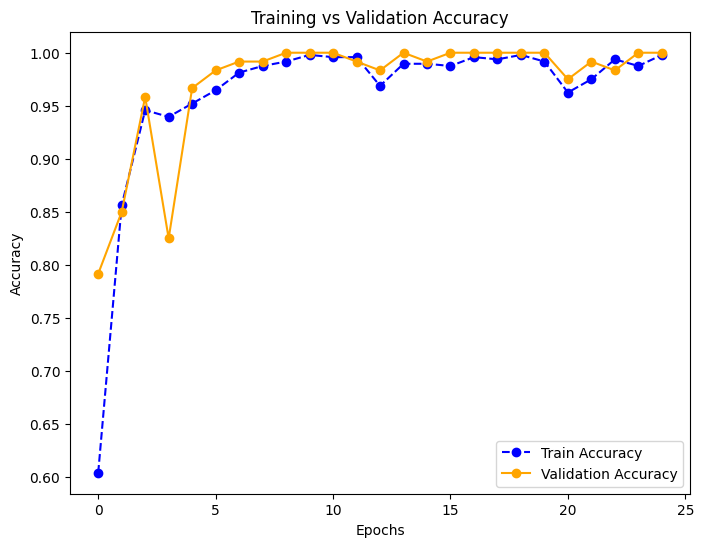

In [4]:
import matplotlib.pyplot as plt

# Plot Accuracy Trends
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o', linestyle="dashed", color="blue")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle="solid", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

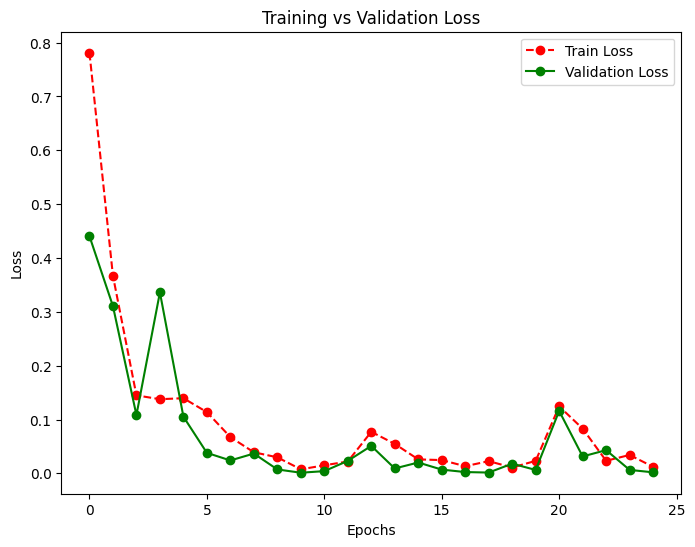

In [5]:
# Plot Loss Trends
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o', linestyle="dashed", color="red")
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', linestyle="solid", color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()